# Analysis on LSE, UCL, and Oxbridge Economics Department Faculty Staff Academic Contribution

## Table of content
---
**1 Introduction**
- 1.1 Motivation
- 1.2 Goal of the study

**2 Data acquisition**
- 2.1 Datasets usage
- 2.2 Description of the data
- 2.3 Specify where you have stored the data
- 2.4 API and module statement

**3 Data preparation**
- 3.1 Data importing and exploration

**4 EDA**
- 4.1 Visualisation

**5 Conclusion**

- 5.1 Result summarisation
- 5.2 Answer to the question
- 5.3 Other findings
- 5.4 Discussion of the limitations
- 5.5 Improvement
---

## 1 Introduction

On the 22nd of March 2023, the highly anticipated results of the "World University Rankings by Subject 2023" were announced by QS, a globally recognized provider of higher education and career information. And according to the ranking under the branch of Economics & Econometrics, London School of Economics (LSE) was ranked first in the UK, followed by University of Oxford, University of Cambridge and UCL (see more: https://www.topuniversities.com/university-rankings/university-subject-rankings/2023/economics-econometrics?&countries=gb ). It is a huge success for LSE Economics Department as a whole. This provides us an inspiration to provide an analysis of the top-ranked universities in the UK per Economics department’s academic contribution and their respective strengths in the field.


In this study, we will examine the Economics departments of the top UK universities from two perspectives. First, we will investigate the most common subfields other than economics among the faculty of these departments. Second, we will explore the average academic workload per faculty member of each university's economics department. By analysing these two factors, we aim to provide insights into the distribution of academic expertise and workload in the field of economics at the top UK universities.

## 2 Data aquisition
Firstly, we are collecting the names from each university’s official (departmental) website (_latest access date: 22th April, 2023_):

| University        | Departmental Website   | 
| --------   | :-----  |
| **UCL**        | https://www.ucl.ac.uk/economics/people/academic-and-teaching-staff  | 
| **LSE**         |  https://www.lse.ac.uk/economics/people/faculty   | 
| **Oxford**    |   https://www.economics.ox.ac.uk/our-people?filter-7906-our%20people-2061866=54541&page-2061866=2  | 
| **Cambridge**        | https://www.econ.cam.ac.uk/people/academic-staff | 

From each website, we web-scrapped names for the Economics Faculty and loaded them to four lists of `str`. However, because the names from Oxford website is embedded inside each staff’s personal academic website article link, it is very hard and inefficient to get the name strings, so we manually copy paste the whole web-page and keep the names shown in a `list`. Additionally, we found some of the names are with the address of the staff, when searching them, we usually delete them, so we reformat the names by dropping the address.


In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from tqdm import tqdm

In [58]:
# list of names of department of economics faulty staff from London School of Economics and Political Science

# Send a request to the URL of the web page
page = requests.get("https://www.lse.ac.uk/economics/people/faculty")

# Create a BeautifulSoup object from the page content
lse_soup = BeautifulSoup(page.content, 'html.parser')
lse_divs = lse_soup.select('html > body > form > div:nth-of-type(3) > div > div:nth-of-type(2) > div > div')
lse_num_of_staff = len(lse_divs) + 1
lse_names = []

for n in range(1,lse_num_of_staff):
    lse_staff = lse_soup.select_one(f'html > body > form > div:nth-of-type(3) > div > div:nth-of-type(2) > div > div:nth-of-type({n}) > div:nth-of-type(2) > p > a')
    lse_staff_detail = lse_staff.text
    # Split the string into two parts at the first occurrence of "/"
    parts = lse_staff_detail.split('/', 1)
    # Get the first part of the resulting list for the full name
    substring = parts[0]
    lse_names.append(substring)

In [59]:
# list of names of department of economics faulty staff from University College of London

ucl_url = 'https://www.ucl.ac.uk/economics/people/academic-and-teaching-staff'
ucl_r = requests.get(ucl_url)
ucl_soup = BeautifulSoup(ucl_r.content,'lxml')
ucl_names = []
for tab in ucl_soup.find_all('article'):
    for section in tab.find_all('section', {'class': 'middle-split__column1'}):
        for h4 in section.find('h4'):
            # clean the name
            h4 = (h4.text).replace('\xa0','')
            if h4 == '':
                break
            else:
                ucl_names.append(h4)

In [60]:
# list of names of department of economics faulty staff from University of Cambridge

cam_url = 'https://www.econ.cam.ac.uk/people/academic-staff-atoe'
cam_r = requests.get(cam_url)
cam_soup = BeautifulSoup(cam_r.content, 'lxml')
cam_names = []
for i in range(0, len(cam_soup.find_all('strong')), 2):
    cam_name = cam_soup.find_all('strong')[i].text
    cam_names.append(cam_name)

In [61]:
# list of names of department of economics faulty staff from University of Oxford
ox_names = ['Alison Andrew', 'Maximilian Ahrens', 'Johannes Abeler', 'Abi Adams-Prassl', 
            'Muhammad Farid Ahmed', 'Elizabeth Baldwin', 'Miguel Ballester', 'Alan Beggs', 
            'Vanessa Berenguer Rico', 'Andrea Bernini', 'Mattia Bertazzini', 'Steve Bond', 
            'Christopher Bowdler', 'Stephen Broadberry', 'Andrea Chiavari', 'Giulia Caprini', 
            'Jean-Paul Carvalho', 'Eric Chaney', 'Sarah Clifford', 'Paola Conconi', 'Simon Cowan',
            'Ian Crawford', 'Sergio De Ferra', 'Stefan Dercon', 'Francis Ditraglia', 
            'Artur Doshchyn', 'James Duffy', 'Dennis Egger', 'Martin Ellison', 'Peter Eso', 
            'Andrea Ferrero', 'Douglas Gollin', 'Ayden Higgins', 'Sanjay Jain',
            'Katharina Janezic', 'Beata Javorcik', 'Ian Jewitt', 'Maximilian Kasy', 'Paul Klemperer',
            'Anders Kock', 'Alexandre Kohlhas', 'Nathan Lane', 'Hamish Low', 'Viktor Marinkov',
            'Sophocles Mavroeidis', 'Michael McMahon', 'Romuald Méango', 'Rajssa Mechelli',
            'Margaret Meyer', 'Niclas Moneke', 'Inès Moreno De Barreda', 'Bent Nielsen','Paula Onuchic', 
            'Banu Demir Pakel', 'Alexei Parakhonyak', 'Andrea Pasqualini','Barbara Petrongolo',
            'Daniel Quigley', 'Simon Quinn', 'Federica Romei', 'Lidia Smitkova','Petr Sedlacek', 
            'Kevin Sheppard', 'Ludvig Sinander', 'Howard Smith', 'Alex Teytelboym',
            'Séverine Toussaert', 'Rick Van Der Ploeg', 'John Vickers', 'Martin Weidner', 'Francesco Zanetti']

In [62]:
# to reformat the name without address and whitespace

def reform_name(name):
    name_after = ''
    for word in name.split():
        if word != 'Dr' and word != 'Professor' and word != 'Sir' and word != 'Prof':
            name_after += (word+' ')
    return name_after.strip()

lse_names = list(map(lambda x: reform_name(x), lse_names))
ucl_names = list(map(lambda x: reform_name(x), ucl_names))
cam_names = list(map(lambda x: reform_name(x), cam_names))
ox_names = list(map(lambda x: reform_name(x), ox_names))

print(lse_names)
print('-----------------------------------------------------------------')
print(ucl_names)
print('-----------------------------------------------------------------')
print(cam_names)
print('-----------------------------------------------------------------')
print(ox_names)

['Philippe Aghion', 'Nava Ashraf', 'Oriana Bandiera', 'Charles Bean', 'Tim Besley', 'Mohan Bijapur', 'Gharad Bryan', 'Robin Burgess', 'Michael Callen', 'Francesco Caselli', 'Frank Cowell', 'Wouter Den Haan', 'Maarten De Ridder', 'Swati Dhingra', 'Jeremiah Dittmar', 'Matthias Doepke', 'Andrew Ellis', 'Alessandro Gavazza', 'Maitreesh Ghatak', 'Michael Gmeiner', 'Vassilis Hajivassiliou', 'Jonathon Hazell', 'Javier Hidalgo', 'Ethan Ilzetzki', 'Xavier Jaravel', 'Keyu Jin', 'Tatiana Komarova', 'Katarzyna Krajniewska', 'Camille Landais', 'Jonathan Leape', 'Gilat Levy', 'Matthew Levy', 'Stephen Machin', 'Isabela Manelici', 'Alan Manning', 'Rachael Meager', 'Antonio Mele', 'Guy Michaels', 'Benjamin Moll', 'John Moore', 'Dmitry Mukhin', 'Francesco Nava', 'Rachel Ngai', 'Junius Olivier', 'Taisuke Otsu', 'Martin Pesendorfer', 'Dimitra Petropoulou', 'Michele Piccione', 'Steve Pischke', 'Christopher Pissarides', 'Ronny Razin', 'Daniel Reck', 'Ricardo Reis', 'Nico Rosetti', 'Jane Olmstead-Rumsey', 'T

---
Then we used Springer Nature MetaData API, which provides metadata for 14 million online and real-time published documents. By using the query of author's name, we can get the all the details of this certain author's publications. Thus, using this we can find the main searching area and number of __published__ paper he/she wrote.

However, because the API author searching function defaulted providing those who contain certain **word** not **phrase** of a person, so we restricted the searching query by the constraint the whole name phrase as a complete `str`. 

In the end, we stored each person's research area (field) as well as its number of paper published by each university's Economics Department in eight `Pandas` `DataFrame`.

---

In [74]:
#import api: springer nature API testing

with open('keys.json') as f:
    keys = json.load(f)
api_key = keys['spring']['api_key']

url = 'https://api.springernature.com'
params = {'name': 'Philippe Aghion', 'api_key': api_key}
response = requests.get(url,params = params)

if response.status_code == 200:
    print("API key is valid!")
else:
    print("API key is not valid.")

API key is valid!


In [70]:
def extract_area(name):
    #This function extracts the part of response including subjects of academic work by a particular faculty member
    surname = name.split(' ')[1:]
    first_name = name.split(' ')[0]
    url = f'https://api.springernature.com/metadata/json?api_key={api_key}&q=name%3A%22{surname}%2C%20{first_name}%22%2C%20subject%3AEconomics&s=1&p=10'
    return json.loads(requests.get(url).text)['facets'][0]['values']

def extract_type(name):
    #This funciton extracts the part of the response including types of academic work by a particular faculty member
    surname = name.split(' ')[1:]
    first_name = name.split(' ')[0]
    url = f'https://api.springernature.com/metadata/json?api_key={api_key}&q=name%3A%22{surname}%2C%20{first_name}%22%2C%20subject%3AEconomics&s=1&p=10'
    return json.loads(requests.get(url).text)['facets'][-1]['values']
     
def get_research_area_count(names):
    #This funciton creates a dictionary which keys are research areas by all the members and values are their counts
    research_area = {}
    for name in names: 
        list_of_dicts = extract_area(name) 
        for d in list_of_dicts:
            area = d['value'] 
            count = int(d['count'])
            if area not in research_area.keys():
                research_area[area] = count
            else:
                research_area[area] += count
    return research_area

def get_professor_paper_count(names):
    #This function creates a dictionary which keys are names of all the members and values are number of academic papers/books/journals they have done
    paper_count = {}
    for name in names:
        list_of_dicts = extract_type(name) 
        count = 0
        for d in list_of_dicts:
            count += int(d['count']) 
        paper_count[name] = count 
        if paper_count[name] == 0:
            paper_count.pop(name)
    return paper_count
             

In [73]:
def get_research_area_dataframe(names):
    #This function provides information about research areas in the form of pandas dataframe
    df = pd.DataFrame()
    df['research area'] = list(get_research_area_count(names).keys())
    df['total number'] = list(get_research_area_count(names).values())
    sum_of_papers = sum(list(get_professor_paper_count(names).values()))
    df['proportion of the area'] = [x/sum_of_papers for x in df['total number']]
    df = df.sort_values('total number', ascending = False).reset_index(drop = True)
    return df

In [72]:
df_cam = get_research_area_dataframe(cam_names)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
df_ox = get_research_area_dataframe(ox_names)

,research area,total number,proportion of the area
0,Economics,81,1.000000
1,Public Finance,28,0.345679
2,Economic Theory/Quantitative Economics/Mathema...,27,0.333333
3,Microeconomics,22,0.271605
4,"Economics, general",22,0.271605
5,"Game Theory, Economics, Social and Behav. Scie...",21,0.259259
6,Economic Policy,18,0.222222
7,Macroeconomics/Monetary Economics//Financial E...,18,0.222222
8,Business Mathematics,14,0.172840
9,International Economics,12,0.148148


In [13]:
df_lse = get_research_area_dataframe(lse_names)

,research area,total number,proportion of the area
0,Economics,119,1.000000
1,"Economics, general",33,0.277311
2,Economic Theory/Quantitative Economics/Mathema...,28,0.235294
3,Macroeconomics/Monetary Economics//Financial E...,28,0.235294
4,International Economics,27,0.226891
5,Economic Growth,25,0.210084
6,Public Finance,23,0.193277
7,Development Economics,20,0.168067
8,Econometrics,20,0.168067
9,Labor Economics,17,0.142857


In [14]:
df_ucl = get_research_area_dataframe(ucl_names)

,research area,total number,proportion of the area
0,Economics,140,1.000000
1,Economic Theory/Quantitative Economics/Mathema...,49,0.350000
2,Microeconomics,46,0.328571
3,"Economics, general",35,0.250000
4,Public Finance,30,0.214286
5,"Game Theory, Economics, Social and Behav. Scie...",25,0.178571
6,Labor Economics,25,0.178571
7,Population Economics,20,0.142857
8,Macroeconomics/Monetary Economics//Financial E...,20,0.142857
9,Econometrics,19,0.135714


In [15]:
def get_average(names):
    #This function calculates average amount of academic work per teaching staff
    paper_count = get_professor_paper_count(names)
    average = sum(list(paper_count.values())) / len(paper_count)
    return average

In [16]:
print("##Average amount of academic work per teaching staff in Department of Economics")
print("---------------------------------------------------------------------------------")
print("University of Cambridge:", get_average(cam_names))
print("University of Oxford:", get_average(ox_names))
print("London School of Economics and Political Science:", get_average(lse_names))
print("University College London:", get_average(ucl_names))

##Average amount of academic work per teaching staff in Department of Economics
---------------------------------------------------------------------------------
University of Cambridge: 5.416666666666667
University of Oxford: 2.7
London School of Economics and Political Science: 3.838709677419355
University College London: 4.827586206896552


In [38]:
universities = ['Oxford', 'LSE', 'UCL', 'Cambridge']
all_names = [ox_names, lse_names, ucl_names, cam_names]
uni_avr = []

print("##Average amount of academic work per teaching staff in Department of Economics")
print("---------------------------------------------------------------------------------")

for i in range(len(universities)):
    one_average = get_average(all_names[i])
    uni_avr.append(one_average)
    print(f"{universities[i]}: {one_average}")

##Average amount of academic work per teaching staff in Department of Economics
---------------------------------------------------------------------------------
Oxford: 2.7
LSE: 3.838709677419355
UCL: 4.827586206896552
Cambridge: 5.416666666666667


In [ ]:
import matplotlib.pyplot as plt

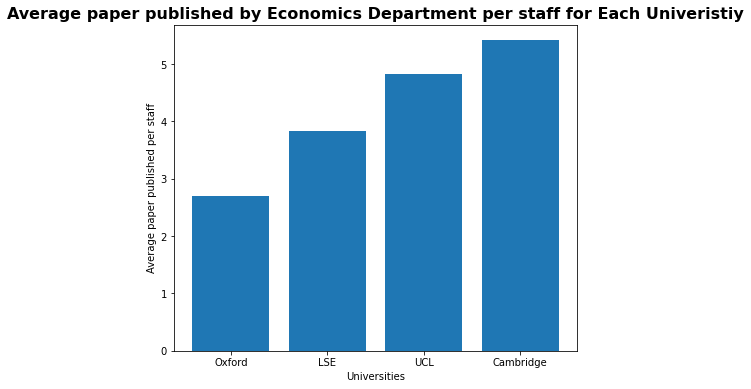

In [45]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(universities, uni_avr)

# Set axis labels and title
ax.set_xlabel('Universities')
ax.set_ylabel('Average paper published per staff')
ax.set_title('Average paper published by Economics Department per staff for Each Univeristiy', fontsize=16, fontweight='bold')
plt.subplots_adjust(left=0.2)
# Show the plot
plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

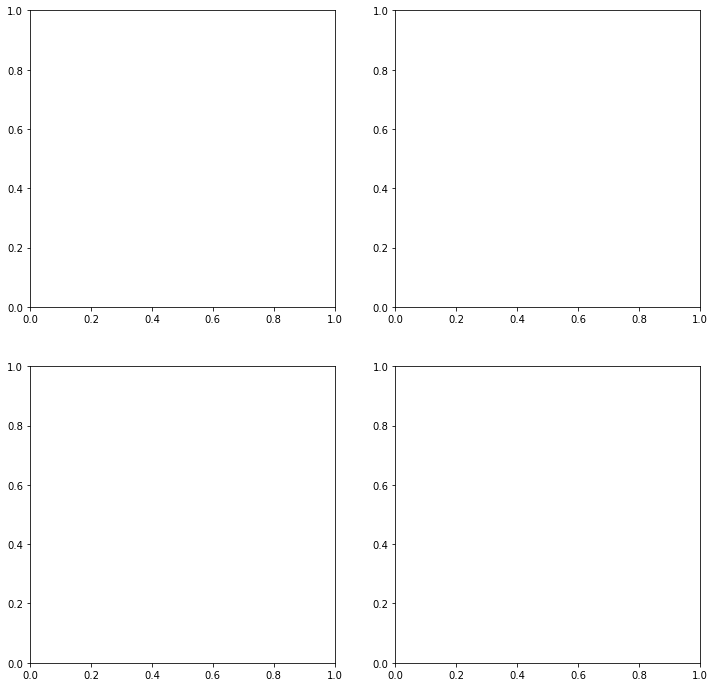

In [54]:
import matplotlib.pyplot as plt

def plot_research_areas(department_names):
    """
    Plot pie charts for the top 5 research areas of each department in the given list of department names.

    Parameters:
    -----------
    department_names : list of str
        A list of department names for which to plot the research areas.

    Returns:
    --------
    None
    """
    # Create a 2x2 grid of subplots for each department's pie chart
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
    axs = axs.flatten()

    # Loop over each department and plot a pie chart for the top 5 research areas
    for i, dept in enumerate(department_names):
        df = get_research_area_dataframe(dept)
        top_five_research_area = df.iloc[1:6]
        wedges, texts, autotexts = axs[i].pie(top_five_research_area['proportion of the area'], labels=top_five_research_area['research area'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
        axs[i].set_title(f'Main research area of {dept} Economics Department', fontsize=20)

        # Increase font size of numbers inside each pie
        for autotext in autotexts:
            autotext.set_fontsize(16)

    # Add a common legend for all pie charts
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')

    plt.show()
plot_research_areas(department_names)